# The libraries are imported first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# The excel file 'DataPlacement.xlsx' is imported

In [2]:
df = pd.read_excel(r"C:\Users\user\Ardent Assignments\DataPlacement.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Branch,Degree,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
1,Applied Electronics and Instrumentation,B. Tech.,584,69,87,53,67,30,20,60,Placed
2,Mechanical Engineering,B. Tech.,584,76,80,73,73,55,40,0,NaN
3,Electronics and Communications Engineering,B. Tech.,578,71,73,73,67,55,47,20,NaN
4,Applied Electronics and Instrumentation,B. Tech.,578,71,93,40,80,50,33,20,NaN


# Suitable column headings are given

In [3]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

,Branch,Degree,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
1,Applied Electronics and Instrumentation,B. Tech.,584,69,87,53,67,30,20,60,Placed
2,Mechanical Engineering,B. Tech.,584,76,80,73,73,55,40,0,NaN
3,Electronics and Communications Engineering,B. Tech.,578,71,73,73,67,55,47,20,NaN
4,Applied Electronics and Instrumentation,B. Tech.,578,71,93,40,80,50,33,20,NaN
5,Electronics and Communications Engineering,B. Tech.,575,64,73,47,73,55,53,20,NaN


# i) Setting Placed: 1 and  NaN: 0
# ii) Dropping the Branch and Degree columns

In [4]:
df.fillna(0,inplace=True)
df.replace('Placed',1,inplace=True)
df.drop(columns=['Branch','Degree'],inplace=True)
df.head()

,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
1,584,69,87,53,67,30,20,60,1
2,584,76,80,73,73,55,40,0,0
3,578,71,73,73,67,55,47,20,0
4,578,71,93,40,80,50,33,20,0
5,575,64,73,47,73,55,53,20,0


## Checking the info of the Dataframe 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 1 to 12864
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Score/800             12864 non-null  int64
 1   Aptitude              12864 non-null  int64
 2   English               12864 non-null  int64
 3   Quantitative          12864 non-null  int64
 4   Analytical            12864 non-null  int64
 5   Domain                12864 non-null  int64
 6   Computer Fundamental  12864 non-null  int64
 7   Coding                12864 non-null  int64
 8   Placement Status      12864 non-null  int64
dtypes: int64(9)
memory usage: 904.6 KB


# Generating the heatmap to show the correlation among columns

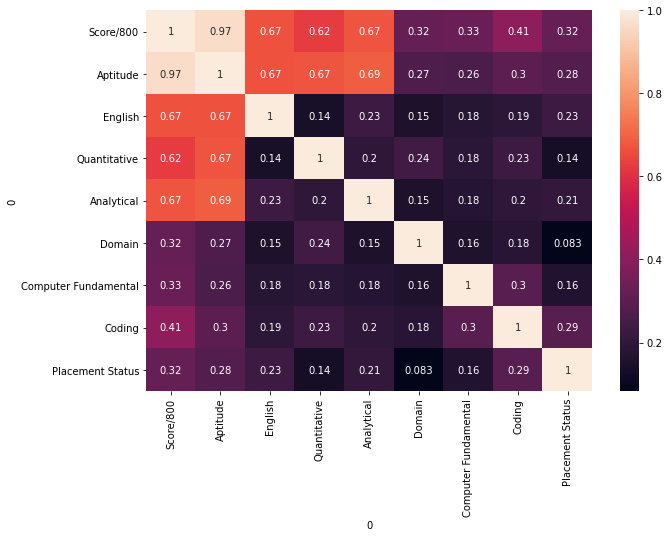

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

### The last row of the heatmap shows that Placement doesn't have good correlation (>=0.5) with any of the columns, so we will consider all the columns for making the predictions better
# ------------------------------------------------------------------------------
### X -> All columns are included except Placement Status
### Y -> Placement Status
### Splitting X, Y into training and testing sets using train_test_split



In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Fitting into a Logistic Regression model and getting predictions

In [8]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

## Using confusion matrix to compare actual and predicted values

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2407   13]
 [ 131   22]]


In [10]:
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted_Pl_status:0','Predicted_Pl_status:1']
cm_df = cm_df.rename(index={0:'Actual_Pl_status:0',1:'Actual_Pl_status:1'})

In [11]:
cm_df

,Predicted_Pl_status:0,Predicted_Pl_status:1
Actual_Pl_status:0,2407,13
Actual_Pl_status:1,131,22


## Accuracy score of the model

In [12]:
score =accuracy_score(y_test,y_pred)
print('Accuracy score: ',score)
print('Hence the model is accurate {} times out of every 100 predictions'.format(int(100*score)))

Accuracy score:  0.9440342013214147
Hence the model is accurate 94 times out of every 100 predictions


## Prediction function

In [13]:
def predict_function():
  print('Enter student Details(Branch,Degree not required): ')
  dict1 = {}
  for i in df.columns:
    if i!='Placement Status':
      value = float(input('Enter the test value for column {}:   '.format(i)))
      dict1[i]=value
  test_values = pd.DataFrame(dict1,index=[0])
  pred_test_values = logreg.predict(test_values)
  print('----------------------------------------------------------------------')
  if pred_test_values == [1]:
    print('The student will be placed')
  else:
    print('The student will not be placed')


In [14]:
predict_function()

Enter student Details(Branch,Degree not required): 
Enter the test value for column Score/800:   122
Enter the test value for column Aptitude:   12
Enter the test value for column English:   21
Enter the test value for column Quantitative:   45
Enter the test value for column Analytical:   22
Enter the test value for column Domain:   34
Enter the test value for column Computer Fundamental:   23
Enter the test value for column Coding:   67
----------------------------------------------------------------------
The student will not be placed
